### 0. 모듈 & 데이터 불러오기

In [29]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [30]:
user_spec = pd.read_csv('user_spec.csv')
loan_result = pd.read_csv('loan_result.csv')
log_data = pd.read_csv('log_data.csv')

### 1. 데이터 살펴보기

In [31]:
#data info, 범주형 unique()

def data_info(data):
    print(data.info(),'\n')
    for i in data.columns:
        if data[i].dtype == 'object':
            print(i)
            print(data[i].unique(),'\n')

In [32]:
user_spec.head()

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,1249046,118218,1985.0,1.0,2022-06-07 06:28:18,660.0,108000000.0,PRIVATEBUSINESS,20151101.0,기타,자가,1000000.0,기타,0.0,NaN,4.0,162000000.0
1,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,기타가족소유,30000000.0,대환대출,0.0,NaN,1.0,27000000.0
2,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,20210901.0,기타,기타가족소유,10000000.0,생활비,0.0,NaN,5.0,15000000.0
3,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,20170101.0,정규직,자가,2000000.0,생활비,0.0,NaN,7.0,344000000.0
4,967833,33400,2000.0,1.0,2022-06-07 08:55:07,630.0,36000000.0,EARNEDINCOME,20210901.0,정규직,기타가족소유,5000000.0,생활비,0.0,0.0,1.0,16000000.0


+ application_id,user_id,birth_year, gender,personal_rehabilitation_yn,personal_rehabilitation_complete_yn 는 object 변경?

In [33]:
data_info(user_spec)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394216 entries, 0 to 1394215
Data columns (total 17 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   application_id                       1394216 non-null  int64  
 1   user_id                              1394216 non-null  int64  
 2   birth_year                           1381255 non-null  float64
 3   gender                               1381255 non-null  float64
 4   insert_time                          1394216 non-null  object 
 5   credit_score                         1289101 non-null  float64
 6   yearly_income                        1394126 non-null  float64
 7   income_type                          1394131 non-null  object 
 8   company_enter_month                  1222456 non-null  float64
 9   employment_type                      1394131 non-null  object 
 10  houseown_type                        1394131 non-null  object 
 11

In [34]:
loan_result.head()

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
0,1748340,2022-06-07 13:05:41,7,191,42000000.0,13.6,NaN
1,1748340,2022-06-07 13:05:41,25,169,24000000.0,17.9,NaN
2,1748340,2022-06-07 13:05:41,2,7,24000000.0,18.5,NaN
3,1748340,2022-06-07 13:05:41,4,268,29000000.0,10.8,NaN
4,1748340,2022-06-07 13:05:41,11,118,5000000.0,16.4,NaN


In [35]:
loan_result.head(50)

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
0,1748340,2022-06-07 13:05:41,7,191,42000000.0,13.6,NaN
1,1748340,2022-06-07 13:05:41,25,169,24000000.0,17.9,NaN
2,1748340,2022-06-07 13:05:41,2,7,24000000.0,18.5,NaN
3,1748340,2022-06-07 13:05:41,4,268,29000000.0,10.8,NaN
4,1748340,2022-06-07 13:05:41,11,118,5000000.0,16.4,NaN
5,1748340,2022-06-07 13:05:40,35,168,21000000.0,15.2,NaN
6,1748340,2022-06-07 13:05:40,44,8,3000000.0,14.8,NaN
7,1748340,2022-06-07 13:05:41,28,217,10000000.0,18.0,NaN
8,1748340,2022-06-07 13:05:46,47,181,31000000.0,13.0,NaN
9,1748340,2022-06-07 13:05:51,11,170,50000000.0,13.3,NaN


+ application_id,loanapply_insert_time,bank_id,product_id object로 변경?

In [36]:
data_info(loan_result)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13527363 entries, 0 to 13527362
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   application_id         int64  
 1   loanapply_insert_time  object 
 2   bank_id                int64  
 3   product_id             int64  
 4   loan_limit             float64
 5   loan_rate              float64
 6   is_applied             float64
dtypes: float64(3), int64(3), object(1)
memory usage: 722.4+ MB
None 

loanapply_insert_time
['2022-06-07 13:05:41' '2022-06-07 13:05:40' '2022-06-07 13:05:46' ...
 '2022-06-03 12:01:57' '2022-06-03 12:01:49' '2022-06-03 12:01:56'] 



In [37]:
log_data.head()

,user_id,event,timestamp,mp_os,mp_app_version,date_cd
0,576409,StartLoanApply,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
1,576409,ViewLoanApplyIntro,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
2,72878,EndLoanApply,2022-03-25 11:14:44,Android,3.8.4,2022-03-25
3,645317,OpenApp,2022-03-25 11:15:09,iOS,3.6.1,2022-03-25
4,645317,UseLoanManage,2022-03-25 11:15:11,iOS,3.6.1,2022-03-25


In [38]:
data_info(log_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17843993 entries, 0 to 17843992
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   user_id         int64 
 1   event           object
 2   timestamp       object
 3   mp_os           object
 4   mp_app_version  object
 5   date_cd         object
dtypes: int64(1), object(5)
memory usage: 816.8+ MB
None 

event
['StartLoanApply' 'ViewLoanApplyIntro' 'EndLoanApply' 'OpenApp'
 'UseLoanManage' 'UsePrepayCalc' 'Login' 'CompleteIDCertification'
 'UseDSRCalc' 'SignUp' 'GetCreditInfo'] 

timestamp
['2022-03-25 11:12:09' '2022-03-25 11:14:44' '2022-03-25 11:15:09' ...
 '2022-05-27 15:30:07' '2022-05-27 16:05:27' '2022-05-27 16:19:10'] 

mp_os
['Android' 'iOS' 'iPadOS' 'android' nan] 

mp_app_version
['3.8.2' '3.8.4' '3.6.1' '3.8.1' '3.8.0' '3.5.0' '3.5.3' '3.7.0' '3.6.0'
 '3.2.2' '3.10.2' '3.13.0' '3.12.1' '3.11.1' '3.10.0' '3.2.0' '3.3.2'
 '3.5.2' '3.11.0' '3.10.1' '3.9.1' '3.12.0' '3.0.2' '3.3.1' '3.9.0

### 02. EDA

In [39]:
#type 변경

def change_type(data,col_list):
    for i in col_list:
        data[i] = data[i].astype('str')
        
    return data

In [40]:
def sep_int_cat(data,col_list): # 0:int, 1:cat
    v2 = change_type(data,col_list) # 타입 변경
    
    int_data = v2.copy() # cat, int 데이터 분리
    cat_data = v2.copy()
    int_cat = [[],[]]
    
    for i in data.columns:
        if 'id' in i or 'time' in i:
            pass
        elif data[i].dtypes != 'object':
            int_cat[0].append(i)
        else:
            int_cat[1].append(i)
    
    int_data = int_data.drop(int_cat[1],axis=1)
    cat_data = cat_data.drop(int_cat[0],axis=1)
    
    return int_data, cat_data

In [41]:
def int_histbox(data):
    for i in data.columns:
        if 'id' in i or 'time' in i:
            pass
        else:
            plt.figure(figsize=(20,5))
            plt.subplot(1,2,1)
            sns.histplot(data=data,x = i,palette = 'Blues',bins=50)
            plt.title('Histogram %s'%i)

            plt.subplot(1,2,2)
            sns.boxplot(data=data,x = i,palette = 'Blues',orient='v')
            plt.title('Boxplot %s'%i)

            plt.show()

In [42]:
def cat_barpie(data):
    colors = sns.color_palette("Blues")
    for i in data.columns:
        if 'id' in i or 'time' in i:
            pass
        else:
            plt.figure(figsize=(20,5))
            plt.subplot(1,2,1)
            dat = data.groupby([i],as_index=False).count()
            sns.barplot(data=dat,x = i,y='user_id',palette = 'Blues')
            plt.xticks(rotation=90)
            plt.title('Barplot %s'%i)

            plt.subplot(1,2,2)
            plt.pie(dat['user_id']/100,labels=dat[i], autopct='%.1f%%',colors=colors)
            plt.title('piechart %s'%i)

            plt.show()

In [43]:
def make_EDA(data,col_list):
    sep_data_int = sep_int_cat(data,col_list)[0]
    sep_data_cat = sep_int_cat(data,col_list)[1]
    int_histbox(sep_data_int)
    cat_barpie(sep_data_cat)

def col_hist(data):
    for i in data.columns:
        if 'id' in i or 'time' in i:
            pass
        else:
            if data[i].dtypes != 'object':
                plt.figure(figsize=(4,4))
                sns.histplot(data, x=data[i], bins=10)
                plt.title('%s histogram'%i)
                plt.show()

C:\Users\juyeo\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


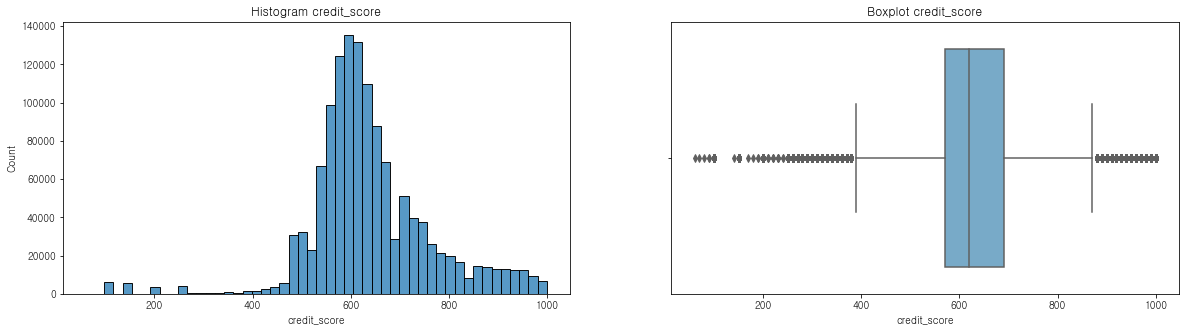

C:\Users\juyeo\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


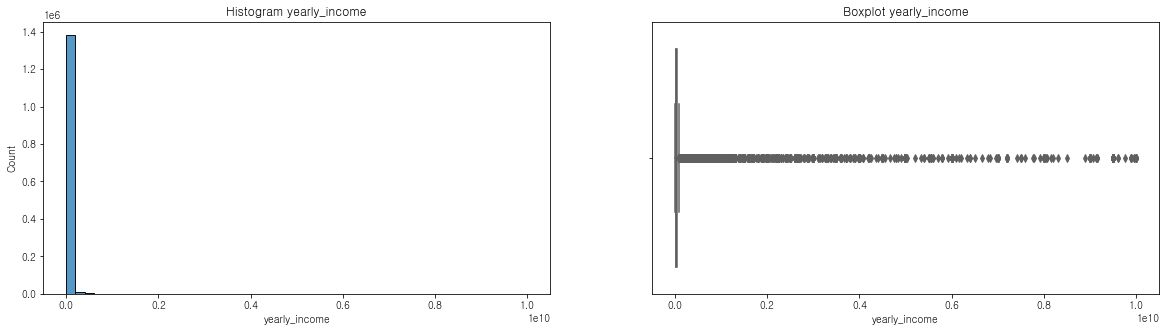

C:\Users\juyeo\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


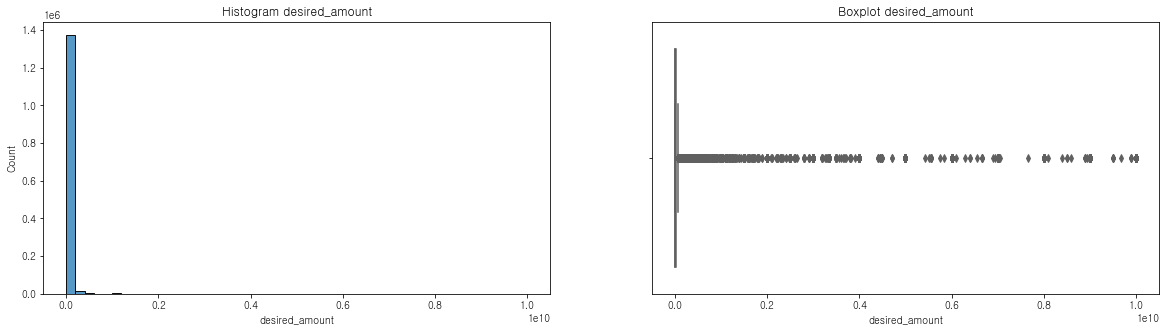

C:\Users\juyeo\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


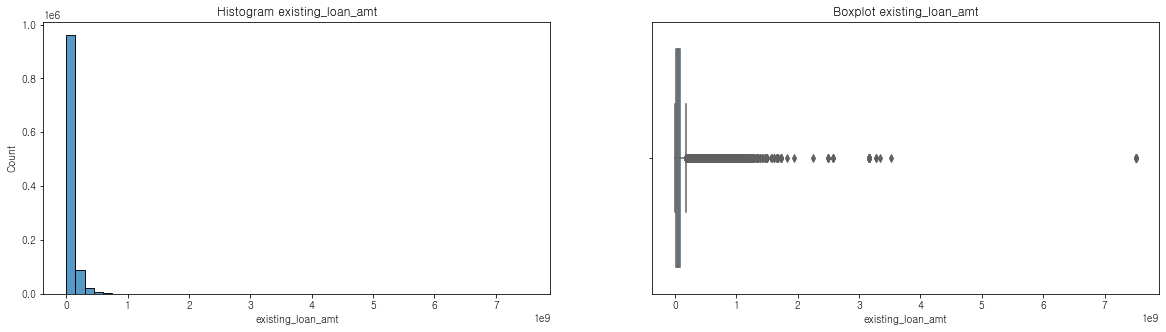

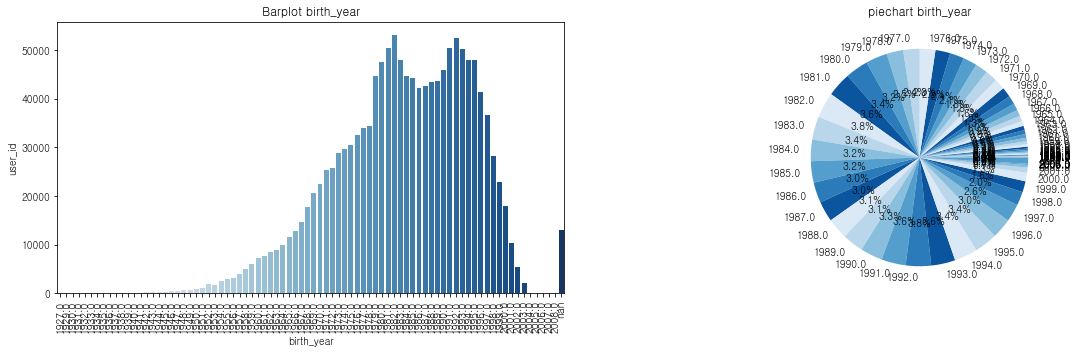

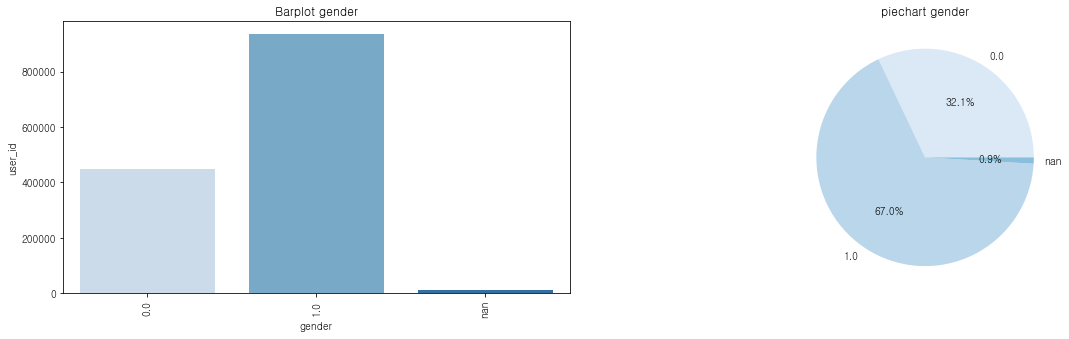

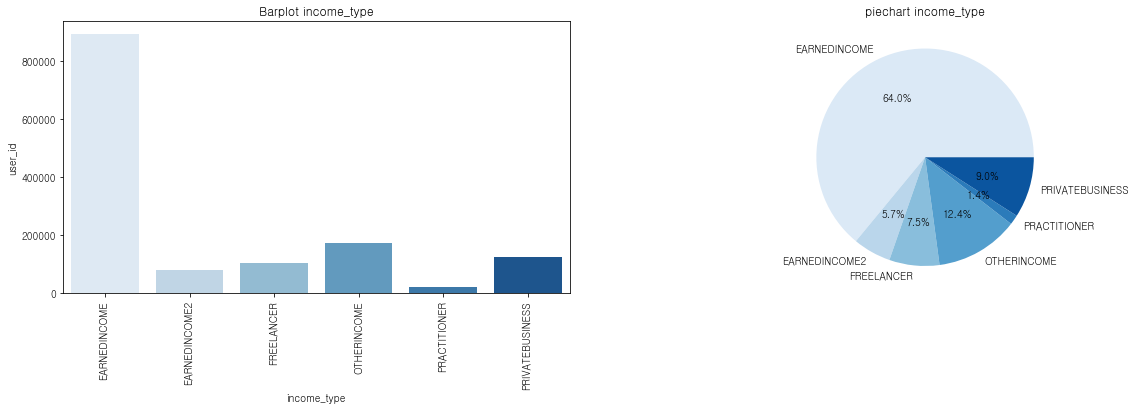

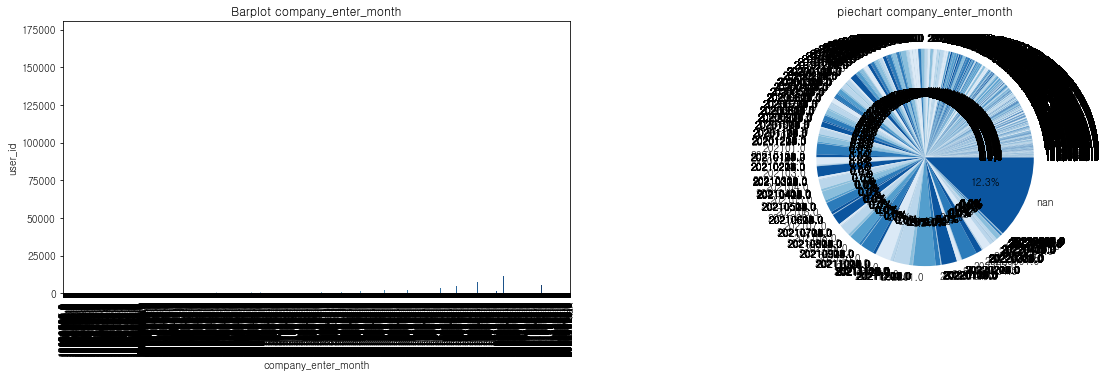

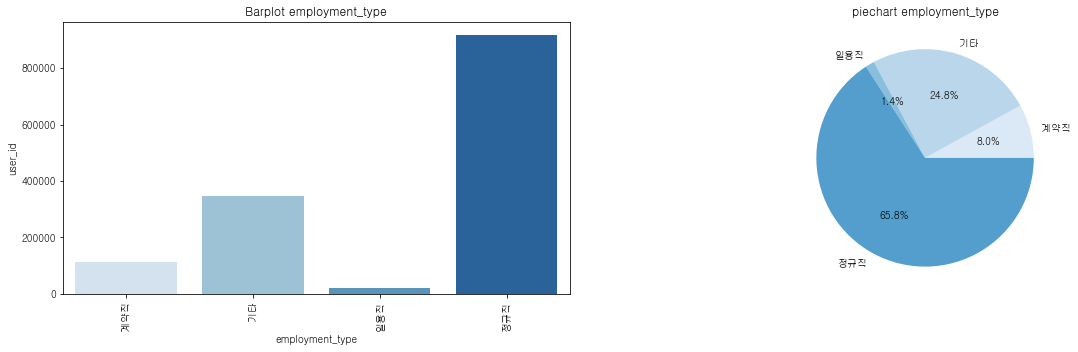

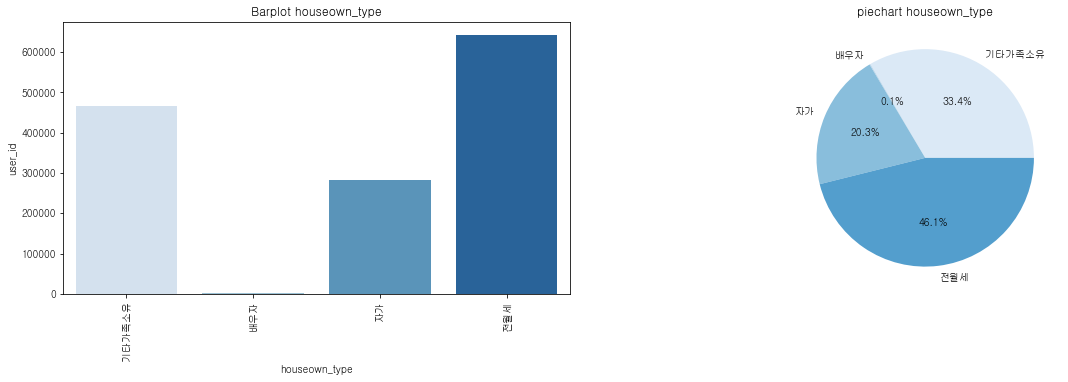

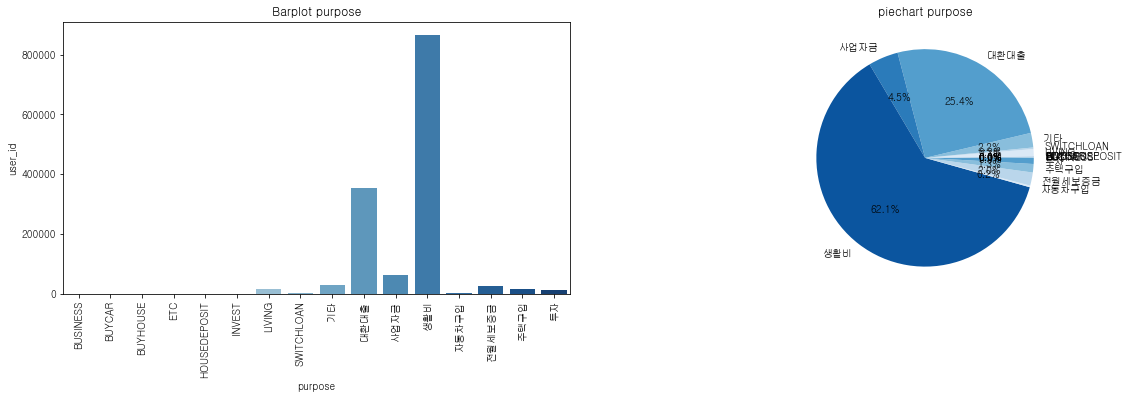

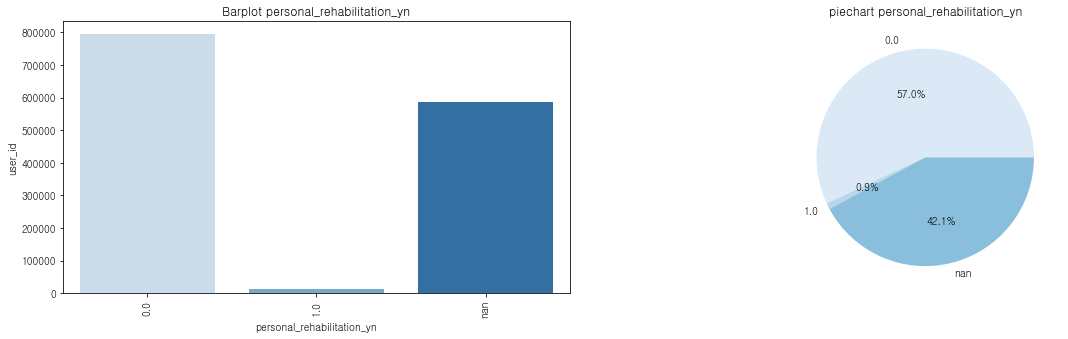

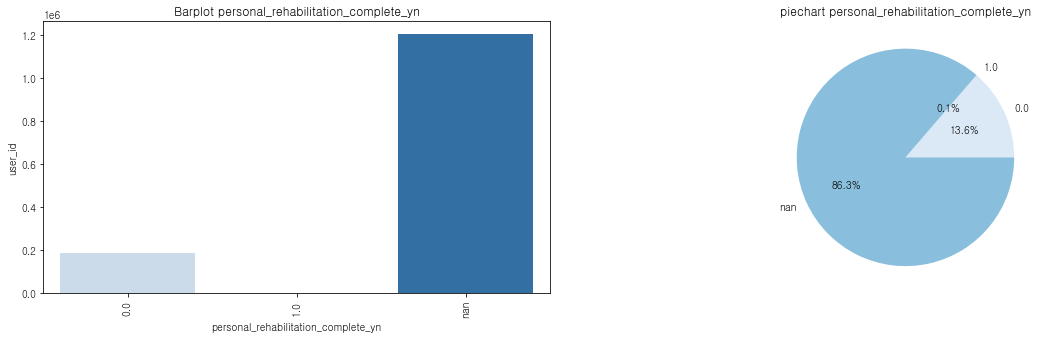

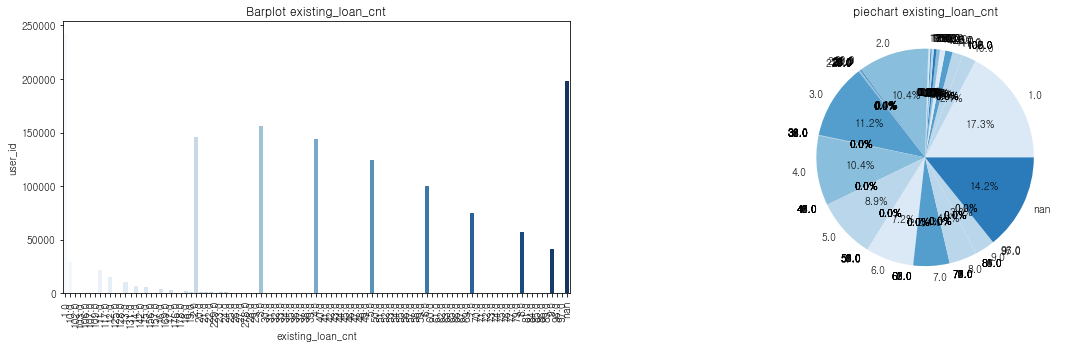

In [44]:
col_list = ['application_id','user_id','birth_year', 'existing_loan_cnt','company_enter_month','gender','personal_rehabilitation_yn','personal_rehabilitation_complete_yn']

make_EDA(user_spec, col_list)

In [ ]:
col_list = ['application_id','user_id','birth_year', 'existing_loan_cnt','company_enter_month','gender','personal_rehabilitation_yn','personal_rehabilitation_complete_yn']

make_EDA(user_spec, col_list)

C:\Users\juyeo\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


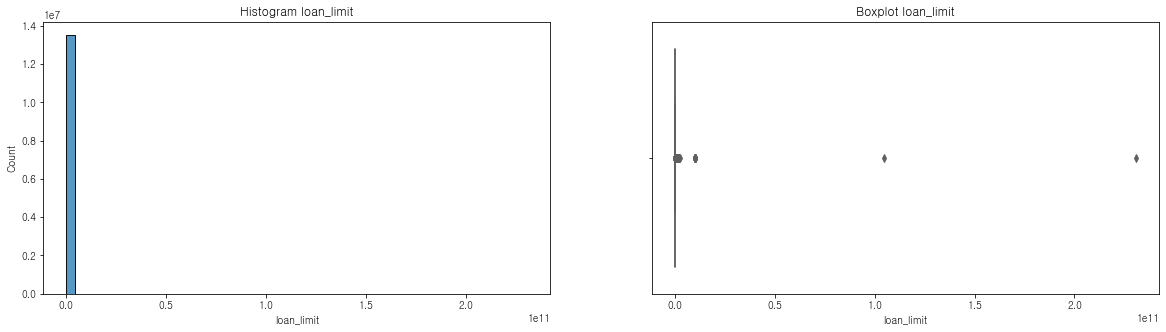

C:\Users\juyeo\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


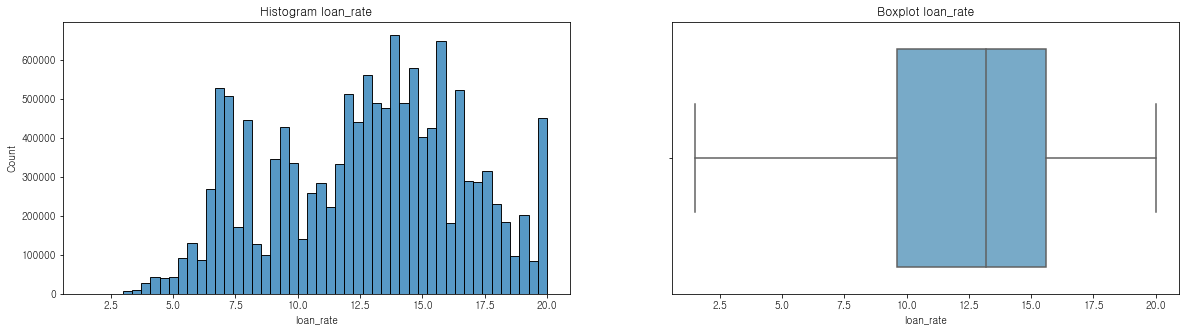

C:\Users\juyeo\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


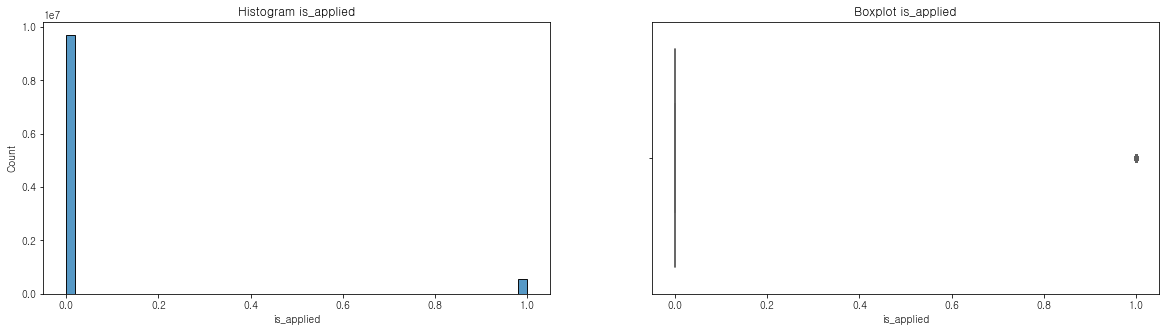

In [47]:
col_list = ['application_id','loanapply_insert_time','bank_id','product_id']

make_EDA(loan_result, col_list)

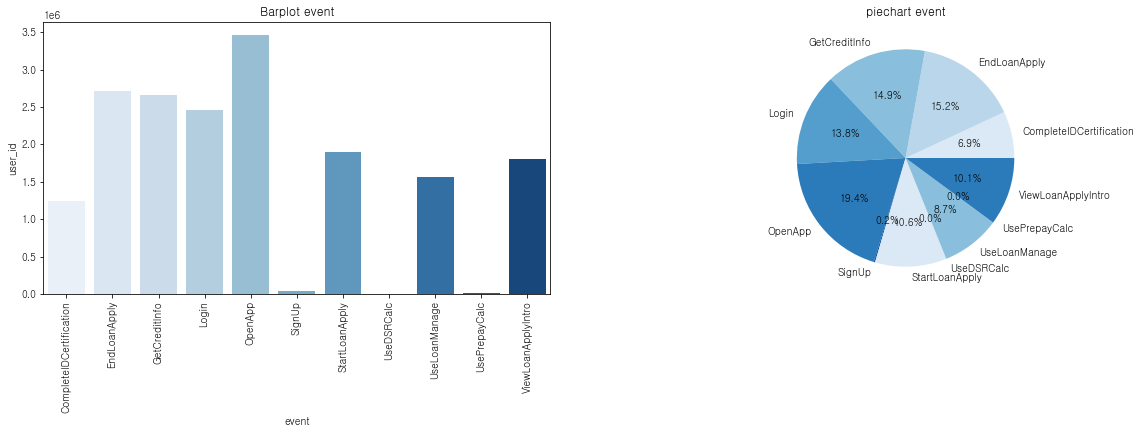

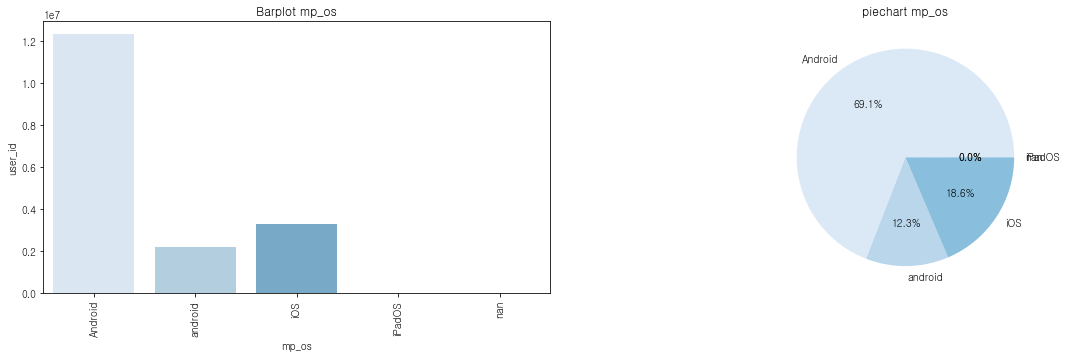

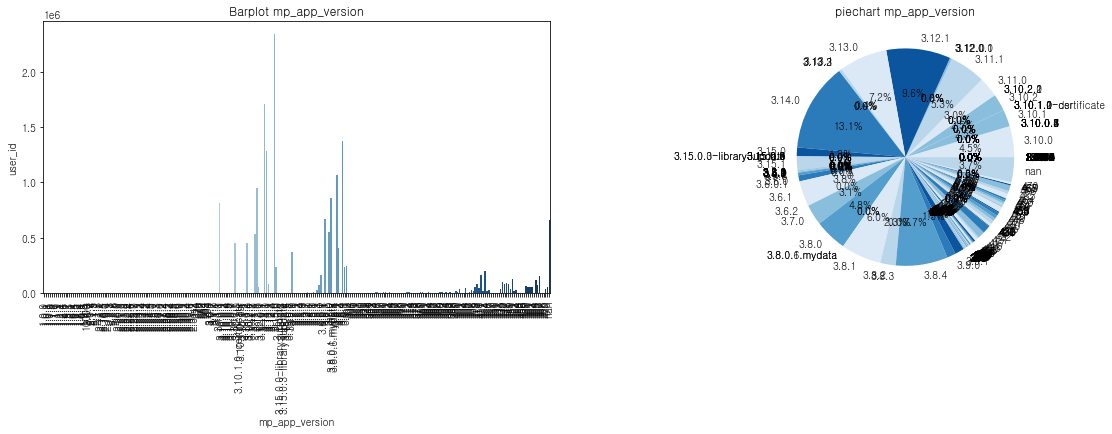

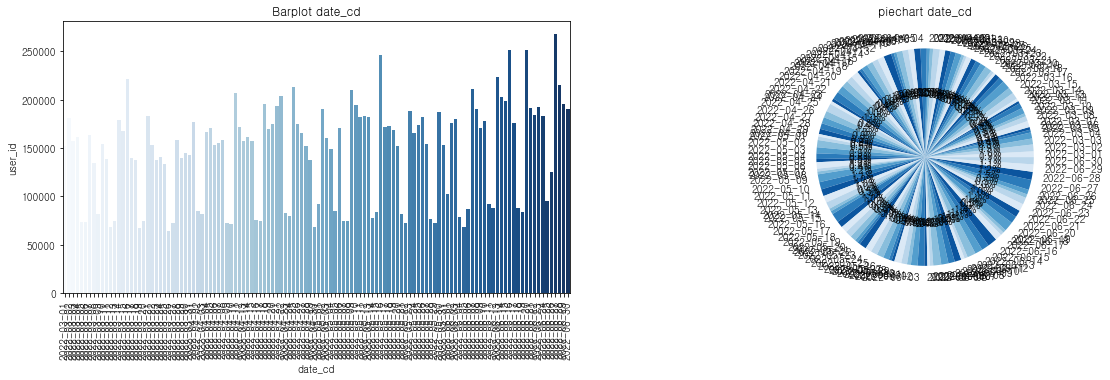

In [48]:
col_list = ['user_id','event','timestamp','mp_os','mp_app_version','date_cd']

make_EDA(log_data, col_list)